In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Exercise 1: Build Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X, y) #The classifier is trained on the entire dataset using the fit() method

# Display the decision tree in text representation
print(export_text(clf, feature_names=iris.feature_names))




|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



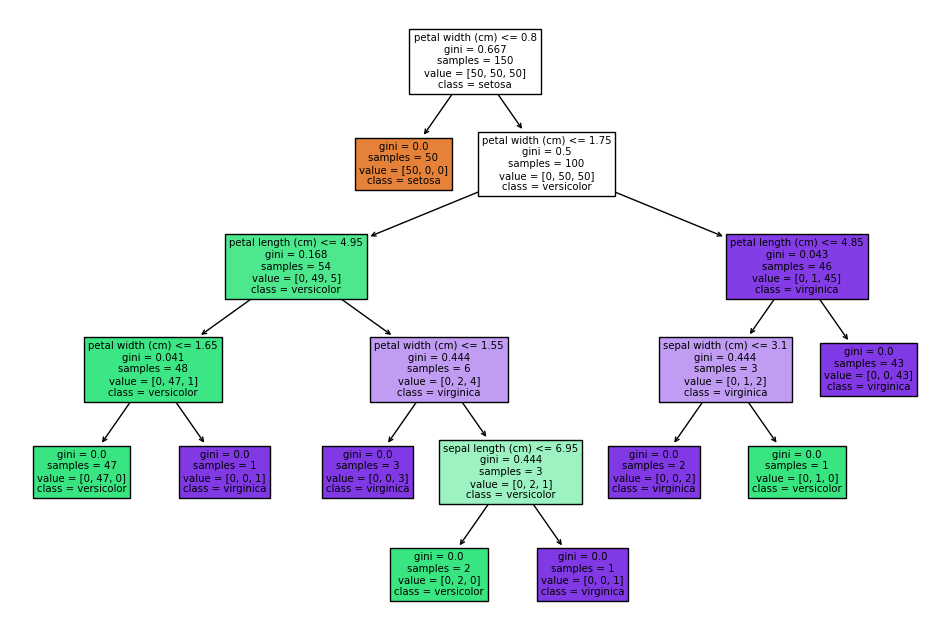

In [2]:
# Plot the decision tree graph
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()



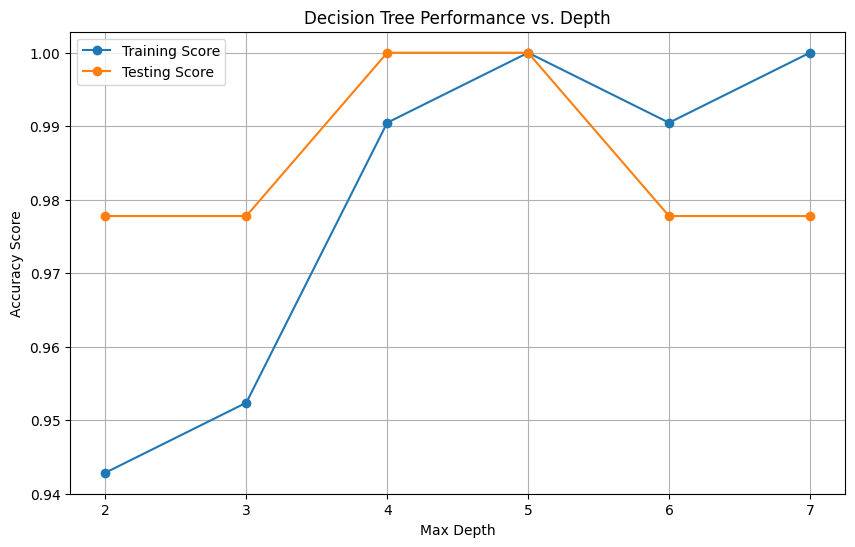

In [3]:
# Exercise 2: Compare performance with different tree depths
depths = [2, 3, 4, 5, 6, 7]
train_scores = []
test_scores = []

for depth in depths:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, marker='o', label='Training Score')
plt.plot(depths, test_scores, marker='o', label='Testing Score')
plt.title('Decision Tree Performance vs. Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.xticks(depths)
plt.show()

By comparing the training and testing scores across different depths, we can identify the optimal depth that maximizes performance without overfitting or underfitting. If the training score is significantly higher than the testing score, it indicates overfitting, while if both scores are low, it suggests underfitting. The goal is to find a depth that achieves high accuracy on both training and testing sets.

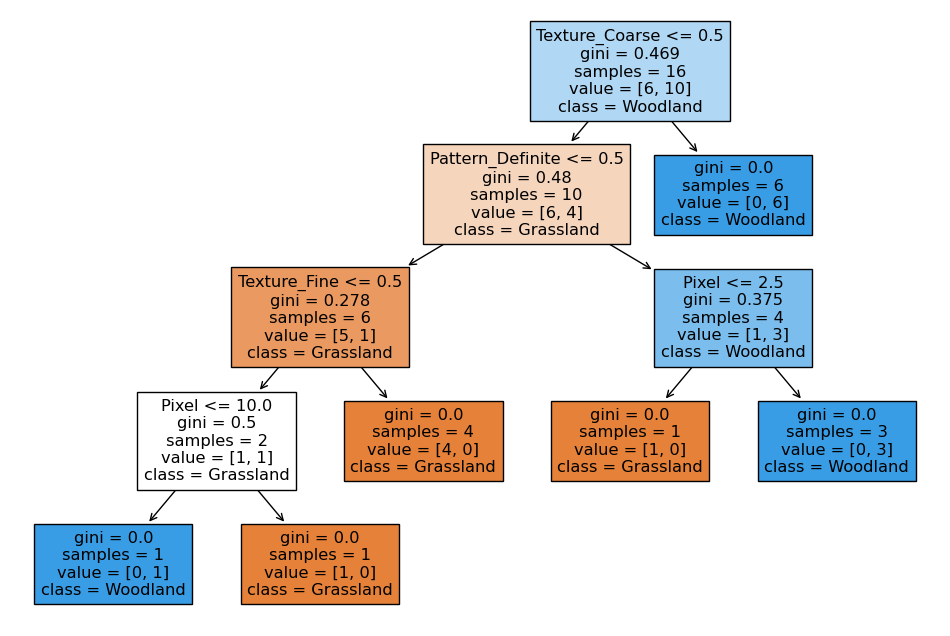

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Given dataset
data = {
    "Pixel": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    "Texture": [
        "Medium", "Fine", "Coarse", "Fine", "Coarse", "Medium", "Fine", "Coarse",
        "Medium", "Fine", "Medium", "Coarse", "Fine", "Coarse", "Coarse", "Fine"
    ],
    "Elevation": [
        "High", "Low", "Low", "Medium", "High", "High", "Medium", "High",
        "Low", "Medium", "Low", "Low", "Medium", "High", "Medium", "High"
    ],
    "Tone": [
        "Dark", "Light", "Dark", "Light", "Dark", "Dark", "Light", "Dark",
        "Dark", "Light", "Dark", "Light", "Light", "Dark", "Dark", "Light"
    ],
    "Pattern": [
        "Definite", "Vague", "Definite", "Definite", "Vague", "Definite",
        "Vague", "Definite", "Vague", "Definite", "Vague", "Vague",
        "Vague", "Definite", "Definite", "Vague"
    ],
    "Land Cover": [
        "Grassland", "Grassland", "Woodland", "Woodland", "Woodland",
        "Woodland", "Grassland", "Woodland", "Woodland", "Woodland",
        "Grassland", "Woodland", "Grassland", "Woodland", "Woodland", "Grassland"
    ],
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Separate features (X) and target variable (y)
X = df.drop(columns=["Land Cover"])
y = df["Land Cover"]

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_encoded, y)

# Plot the decision tree graph
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X_encoded.columns, class_names=clf.classes_)
plt.show()
